In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [16]:
resultpath='..\..\Ergebnisse'
experiment="05_LeNet"
frameworks=["HPMPC","MPyC","MP-SPDZ"]
file_path_latency=".\\"+experiment+'_latency.png'
file_path_packetdrop=".\\"+experiment+'_packetdrop.png'
file_path_bandwidth=".\\"+experiment+'_bandwidth.png'
data=rf.load_data(resultpath,frameworks,experiment,usecase=True)

In [4]:
data[0].columns

Index(['comp.time(s)', 'comp.peakRAM(MiB)', 'bin.filesize(MiB)', 'ssl',
       'threads', 'datatype', 'function', 'optshare', 'packbool', 'protocol',
       'rxbuffer', 'txbuffer', 'latencies(ms)', 'bandwidths(Mbs)',
       'input_size', 'preprocess', 'splitroles', 'packetdrops(%)',
       'verifybuffer', 'inittime(s)', 'preproc(s)', 'runtime_clock(s)',
       'runtime_getTime(s)', 'runtime_chrono(s)', 'runtime_external(s)',
       'peakRAM(MiB)', 'jobCPU(%)', 'framework'],
      dtype='object')

In [11]:
x_values,y_values,labels=rf.get_bandwidth(data)


In [13]:
labels

['HPMPC passive adversary',
 'HPMPC passive adversary',
 'HPMPC passive adversary',
 'MPyC',
 'MP-SPDZ replicated-ring']

In [14]:
labels[0]="HPMPC pas. adv./ hst. maj. RCA"
labels[1]="HPMPC pas. adv./ hst. maj. PPA"
labels[2]="HPMPC pas. adv./ hst. maj. PPA 4-way"
labels[3]="MPyC pas. adv./ hst. maj."
labels[4]="MP-SPDZ pas. adv./ hst. maj."
labels

['HPMPC pas. adv./ hst. maj. RCA',
 'HPMPC pas. adv./ hst. maj. PPA',
 'HPMPC pas. adv./ hst. maj. PPA 4-way',
 'MPyC pas. adv./ hst. maj.',
 'MP-SPDZ pas. adv./ hst. maj.']

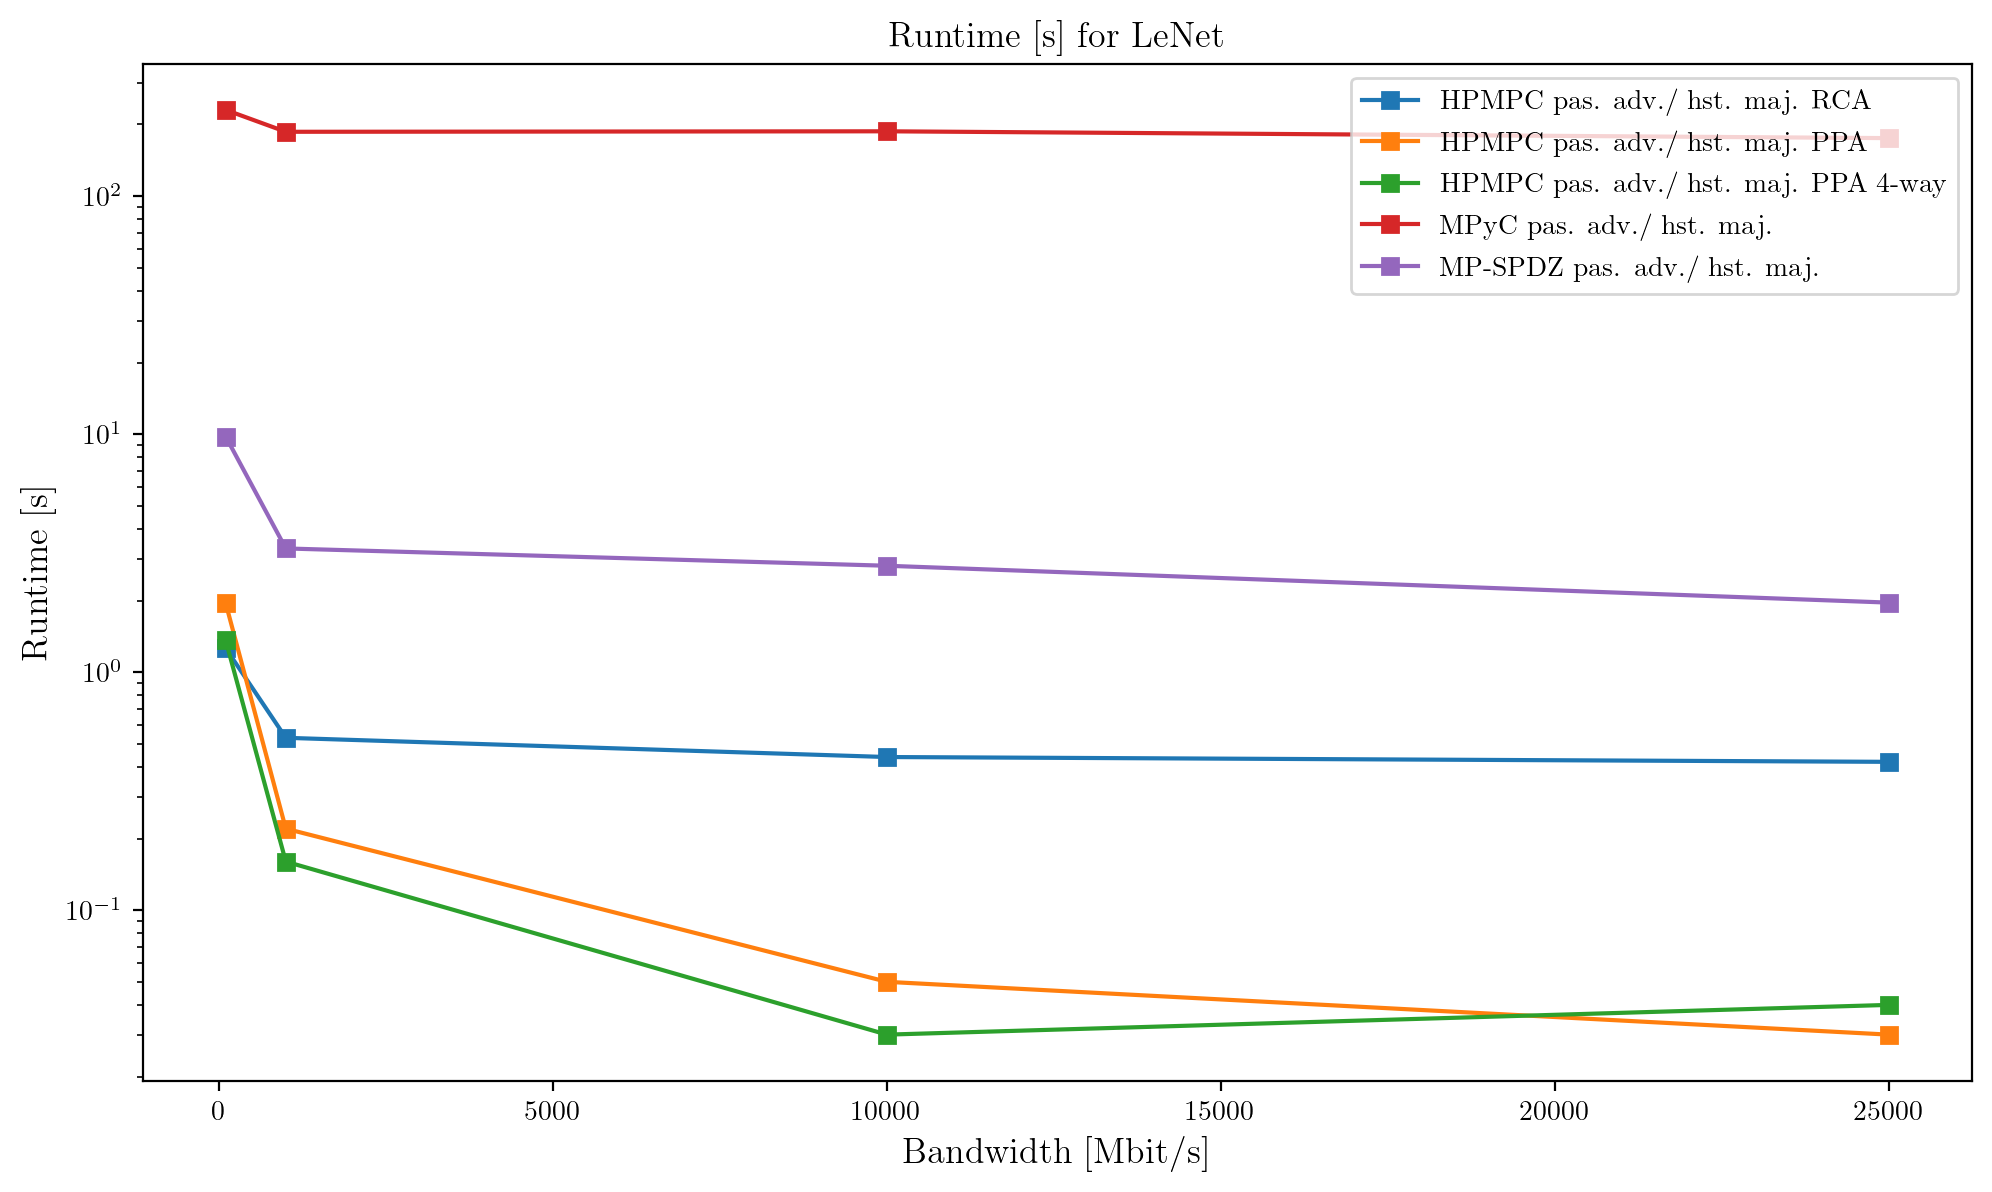

In [17]:
rf.plot_line(x_values,y_values,labels,file_path_bandwidth,experiment,'Bandwidth [Mbit/s]',"Runtime [s]",log=True)

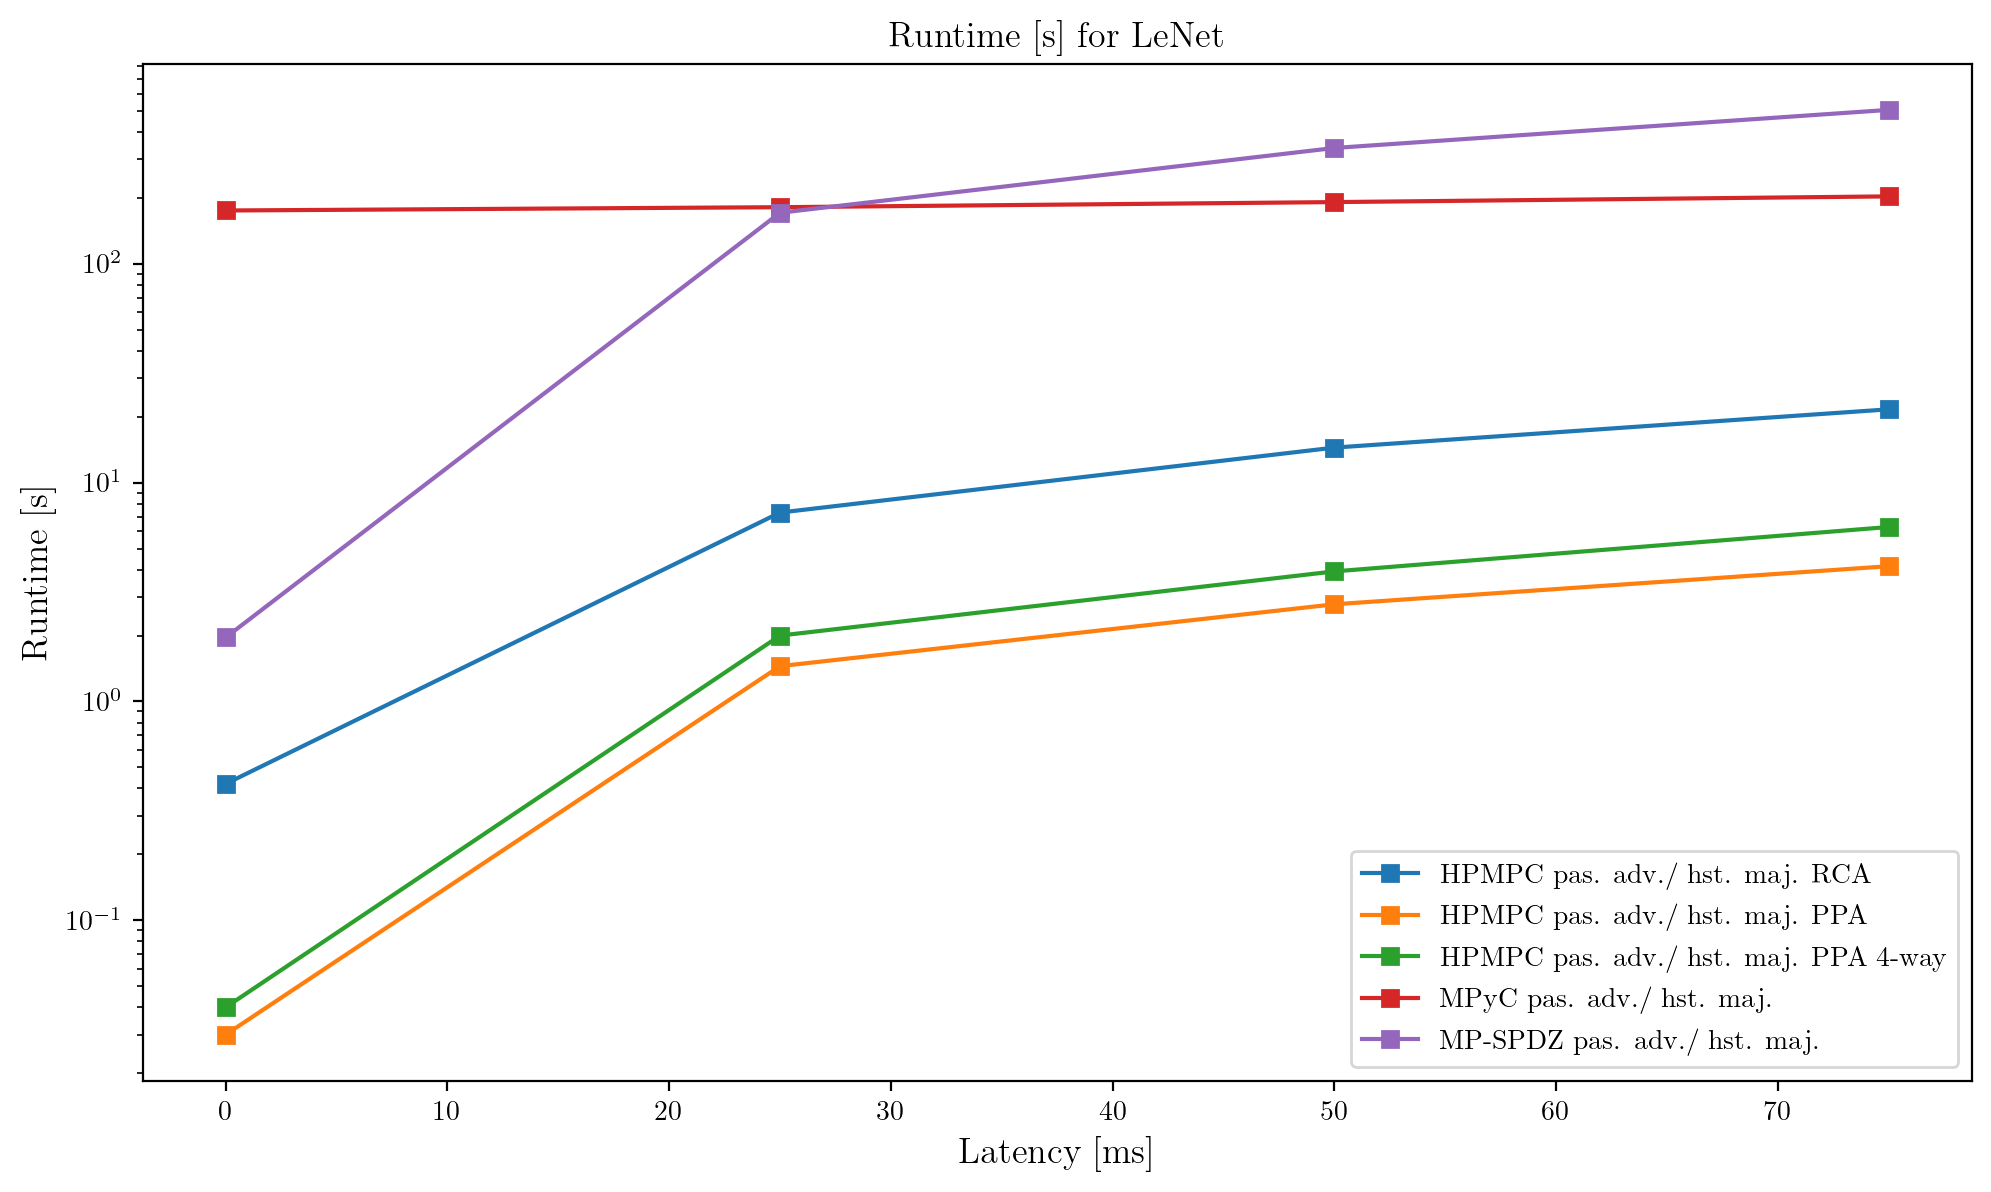

In [19]:
x_values,y_values,labels=rf.get_latency(data)
labels[0]="HPMPC pas. adv./ hst. maj. RCA"
labels[1]="HPMPC pas. adv./ hst. maj. PPA"
labels[2]="HPMPC pas. adv./ hst. maj. PPA 4-way"
labels[3]="MPyC pas. adv./ hst. maj."
labels[4]="MP-SPDZ pas. adv./ hst. maj."
labels
rf.plot_line(x_values,y_values,labels,file_path_latency,experiment,'Latency [ms]',"Runtime [s]",log=True)

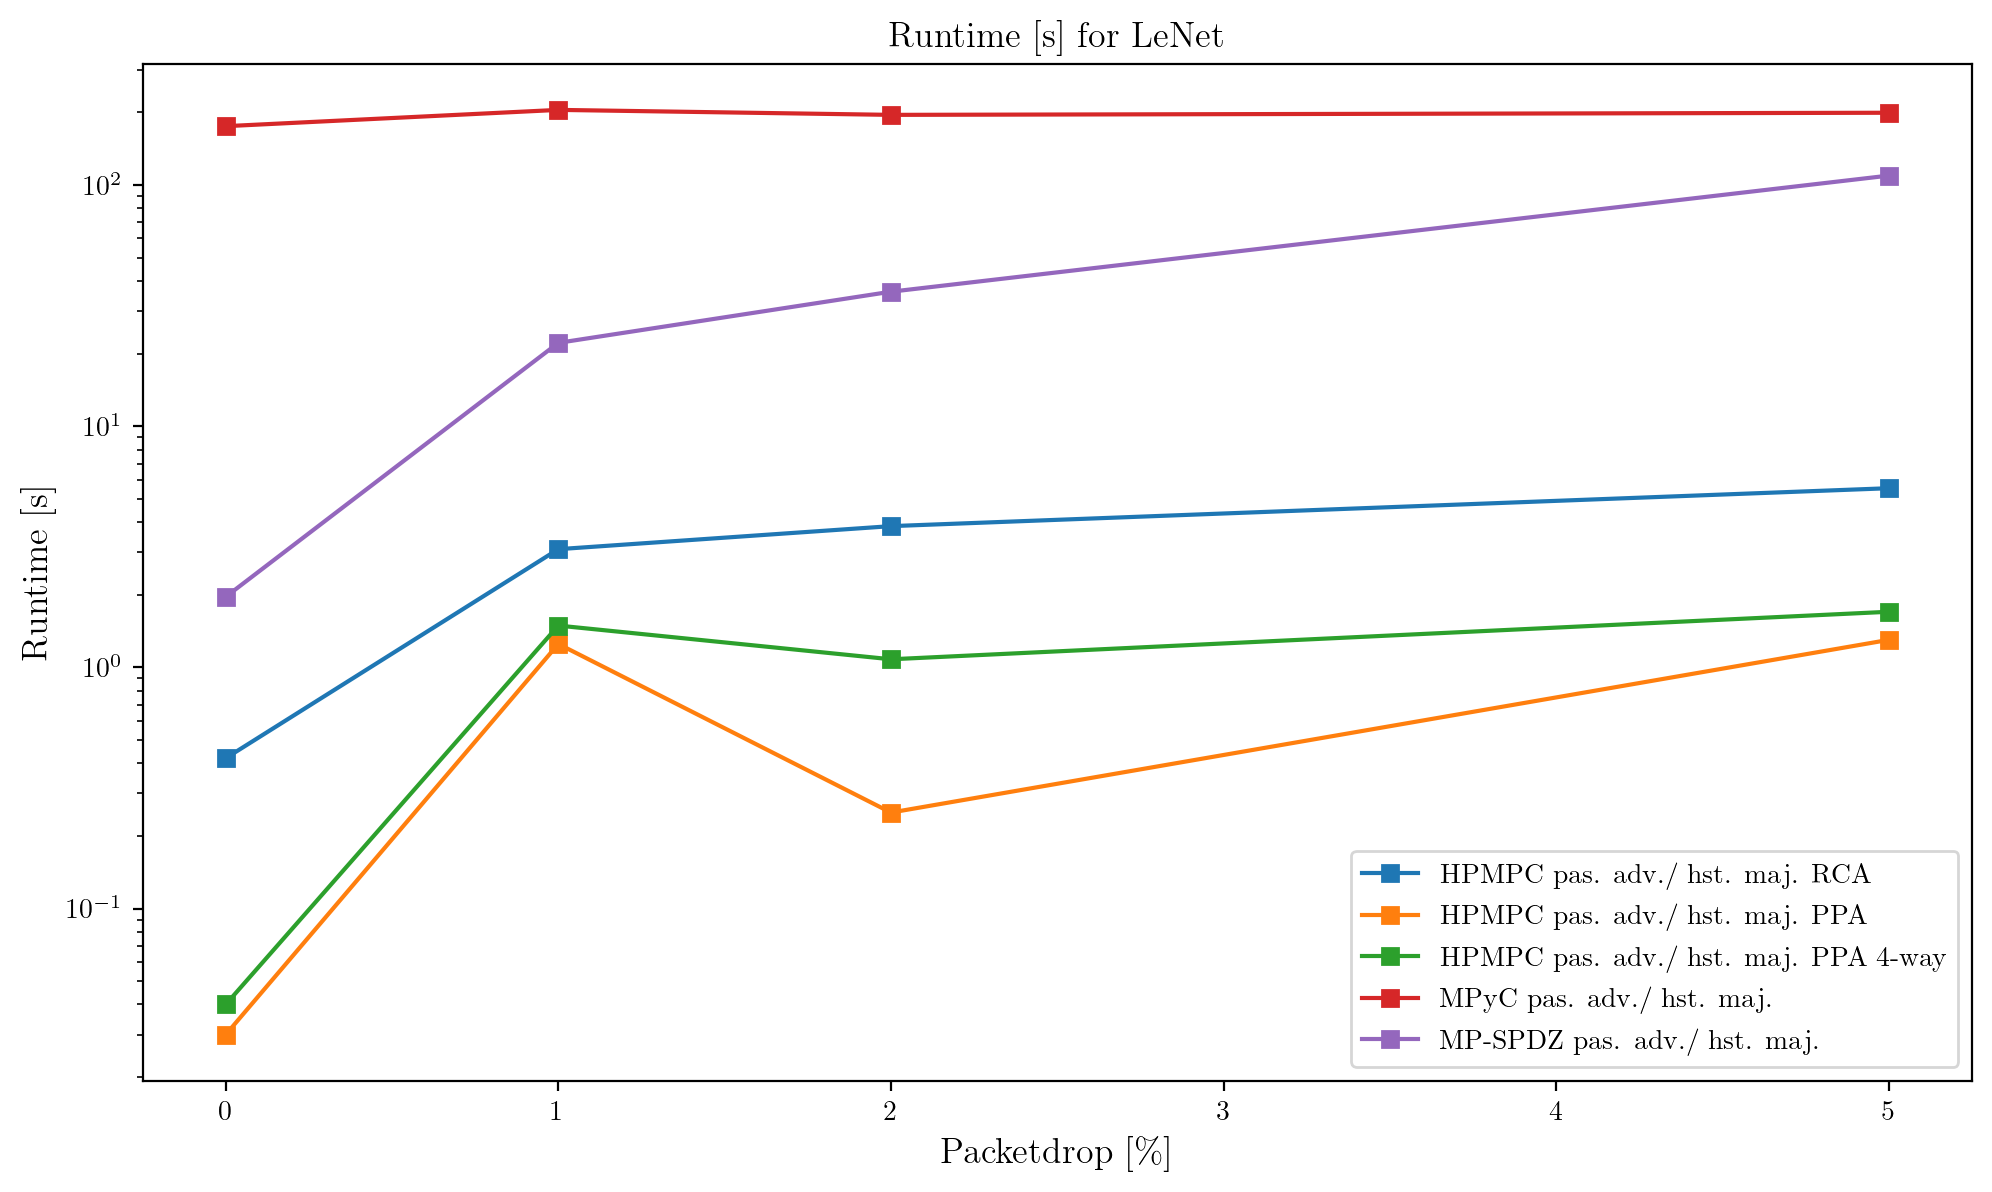

In [20]:
x_values,y_values,labels=rf.get_packetdrop(data)
labels[0]="HPMPC pas. adv./ hst. maj. RCA"
labels[1]="HPMPC pas. adv./ hst. maj. PPA"
labels[2]="HPMPC pas. adv./ hst. maj. PPA 4-way"
labels[3]="MPyC pas. adv./ hst. maj."
labels[4]="MP-SPDZ pas. adv./ hst. maj."
labels
rf.plot_line(x_values,y_values,labels,file_path_packetdrop,experiment,'Packetdrop [\%]',"Runtime [s]",log=True)

In [6]:
y_values = []
x_values = []
labels = []
for i in range(len(data)):
    if(data[i]['framework'][0] in 'HPMPC'):
        for function in data[i]['function'].unique():
            y_values.append(data[i].loc[(data[i]['function']==function) & (data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['latencies(ms)'] == 0) & (data[i]['preprocess']==0), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
            x_values.append(data[i]['packetdrops(%)'].unique()[0:4])
            labels.append("HPMPC passive adversary")
    elif(data[i]['framework'][0] in 'MPyC'):
        y_values.append(data[i].loc[(data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['latencies(ms)'] == 0), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
        x_values.append(data[i]['packetdrops(%)'].unique()[0:4])
        labels.append("MPyC")
    else:
        for protocol in data[i]['protocol'].unique():
            if protocol not in ["malicious-rep-field","sy-rep-field","boolean_gmw","boolean_bmr","semi2k","arithmetic_gmw","semi-bin","ps-rep-bin","ps-rep-field","ps-rep-ring","ps-rep-shamir","ps-rep-ring"]:
                y_values.append(data[i].loc[(data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['latencies(ms)'] == 0) & (data[i]['protocol']==protocol), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
                x_values.append(data[i]['packetdrops(%)'].unique()[0:4])
                labels.append(data[i]['framework'][0]+ " " + protocol)

In [14]:
labels[0]="HPMPC pas. adv./ hst. maj."
labels[1]="MPyC pas. adv./ hst. maj."
labels[2]="MP-SPDZ pas. adv./ hst. maj. field"
labels[3]="MP-SPDZ pas. adv./ hst. maj. ring"

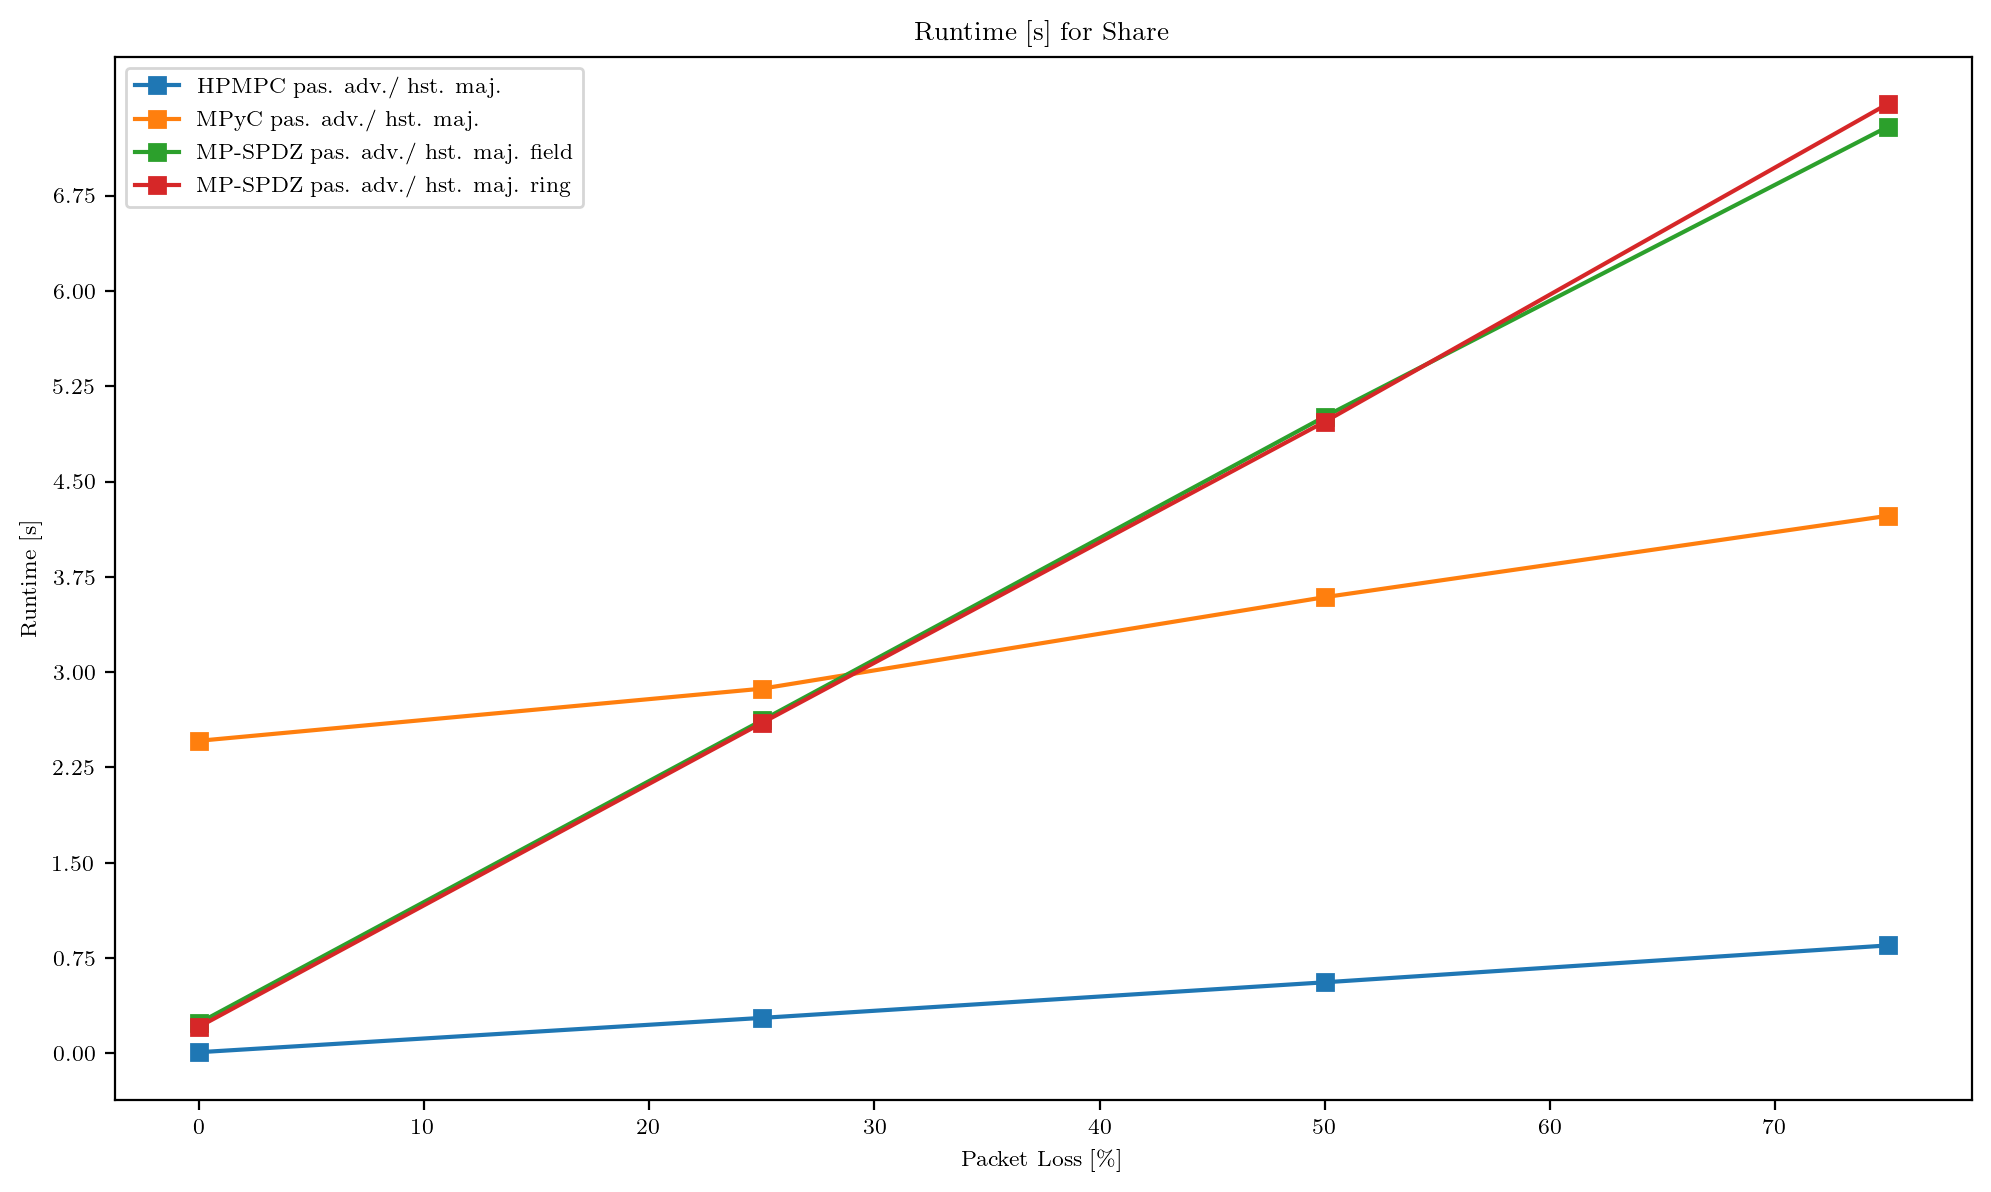

In [64]:
rf.plot_line(x_values,y_values,labels,"packetdrop_honest",experiment,x_axis="Packet Loss [\%]",y_axis="Runtime [s]")

In [60]:
y_values = []
x_values = []
labels = []
for i in range(len(data)):
    if(data[i]['framework'][0] in 'HPMPC'):
        for function in data[i]['function'].unique():
                y_values.append(data[i].loc[(data[i]['function']==function) & (data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['packetdrops(%)'] == 0) & (data[i]['preprocess']==0), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
                x_values.append(data[i]['latencies(ms)'].unique()[0:4])
                labels.append("HPMPC passive adversary")
    elif(data[i]['framework'][0] in 'MPyC'):
        y_values.append(data[i].loc[(data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['packetdrops(%)'] == 0), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
        x_values.append(data[i]['latencies(ms)'].unique()[0:4])
        labels.append("MPyC")
    else:
        for protocol in data[i]['protocol'].unique():
            if protocol not in ["sy-rep-field","replicated-field","ps-rep-bin","arithmetic_gmw","boolean_gmw","semi2k","semi-bin","boolean_bmr","ps-rep-field","ps-rep-ring","ps-rep-shamir","ps-rep-ring"]:
                y_values.append(data[i].loc[(data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['packetdrops(%)'] == 0) & (data[i]['protocol']==protocol), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
                x_values.append(data[i]['latencies(ms)'].unique()[0:4])
                labels.append(data[i]['framework'][0]+ " " + protocol)


In [61]:
labels[0]="HPMPC pas. adv./ hst. maj."
labels[1]="MPyC pas. adv./ hst. maj."
labels[2]="MP-SPDZ pas. adv./ hst. maj. field"
labels[3]="MP-SPDZ pas. adv./ hst. maj. ring"

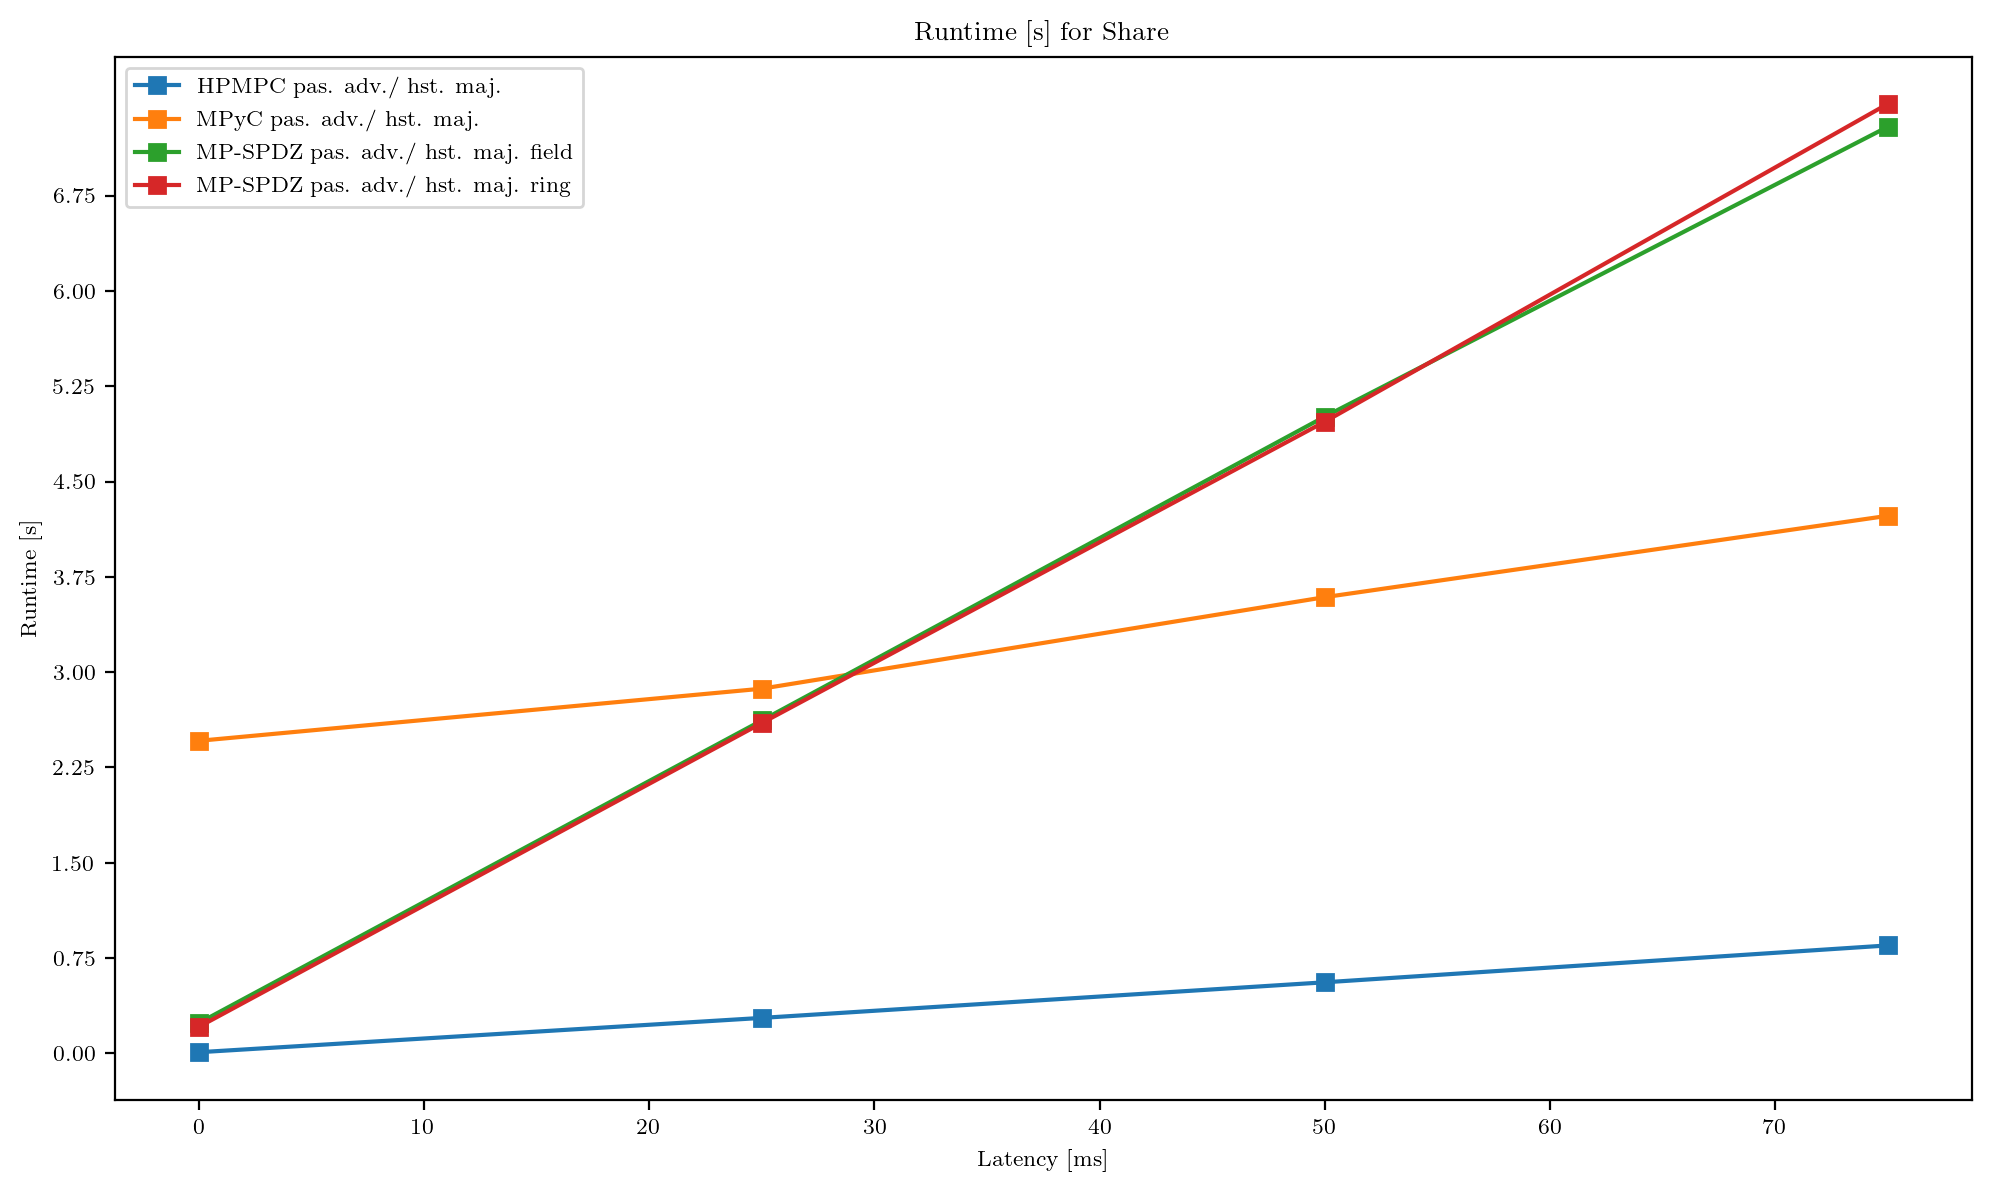

In [65]:
rf.plot_line(x_values,y_values,labels,"latency_honest",experiment,x_axis="Latency [ms]",y_axis="Runtime [s]")

In [18]:
y_values = []
x_values = []
labels = []
for i in range(len(data)):
    if(data[i]['framework'][0] in 'HPMPC'):
        for function in data[i]['function'].unique():
            y_values.append(data[i].loc[(data[i]['function']==function) & (data[i]['latencies(ms)'] == 0) & (data[i]['packetdrops(%)'] == 0), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
            x_values.append(data[i]['bandwidths(Mbs)'].unique()[0:4])
            labels.append("HPMPC passive adversary")
    elif(data[i]['framework'][0] in 'MPyC'):
        y_values.append(data[i].loc[(data[i]['latencies(ms)'] == 0) & (data[i]['packetdrops(%)'] == 0), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
        x_values.append(data[i]['bandwidths(Mbs)'].unique()[0:4])
        labels.append("MPyC")
    else:
        for protocol in data[i]['protocol'].unique():
            if protocol not in ["malicious-rep-field","sy-rep-field","boolean_gmw","boolean_bmr","semi2k","ps-rep-bin","arithmetic_gmw","semi-bin","ps-rep-field","ps-rep-ring","ps-rep-shamir","ps-rep-ring"]:
                y_values.append(data[i].loc[(data[i]['latencies(ms)'] == 0) & (data[i]['packetdrops(%)'] == 0) & (data[i]['protocol']==protocol) , ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
                x_values.append(data[i]['bandwidths(Mbs)'].unique()[0:4])
                labels.append(data[i]['framework'][0]+ " " + protocol)


In [19]:
labels

['HPMPC passive adversary',
 'MPyC',
 'MP-SPDZ replicated-field',
 'MP-SPDZ replicated-ring']

In [20]:
labels[0]="HPMPC pas. adv./ hst. maj."
labels[1]="MPyC pas. adv./ hst. maj."
labels[2]="MP-SPDZ pas. adv./ hst. maj. field"
labels[3]="MP-SPDZ pas. adv./ hst. maj. ring"

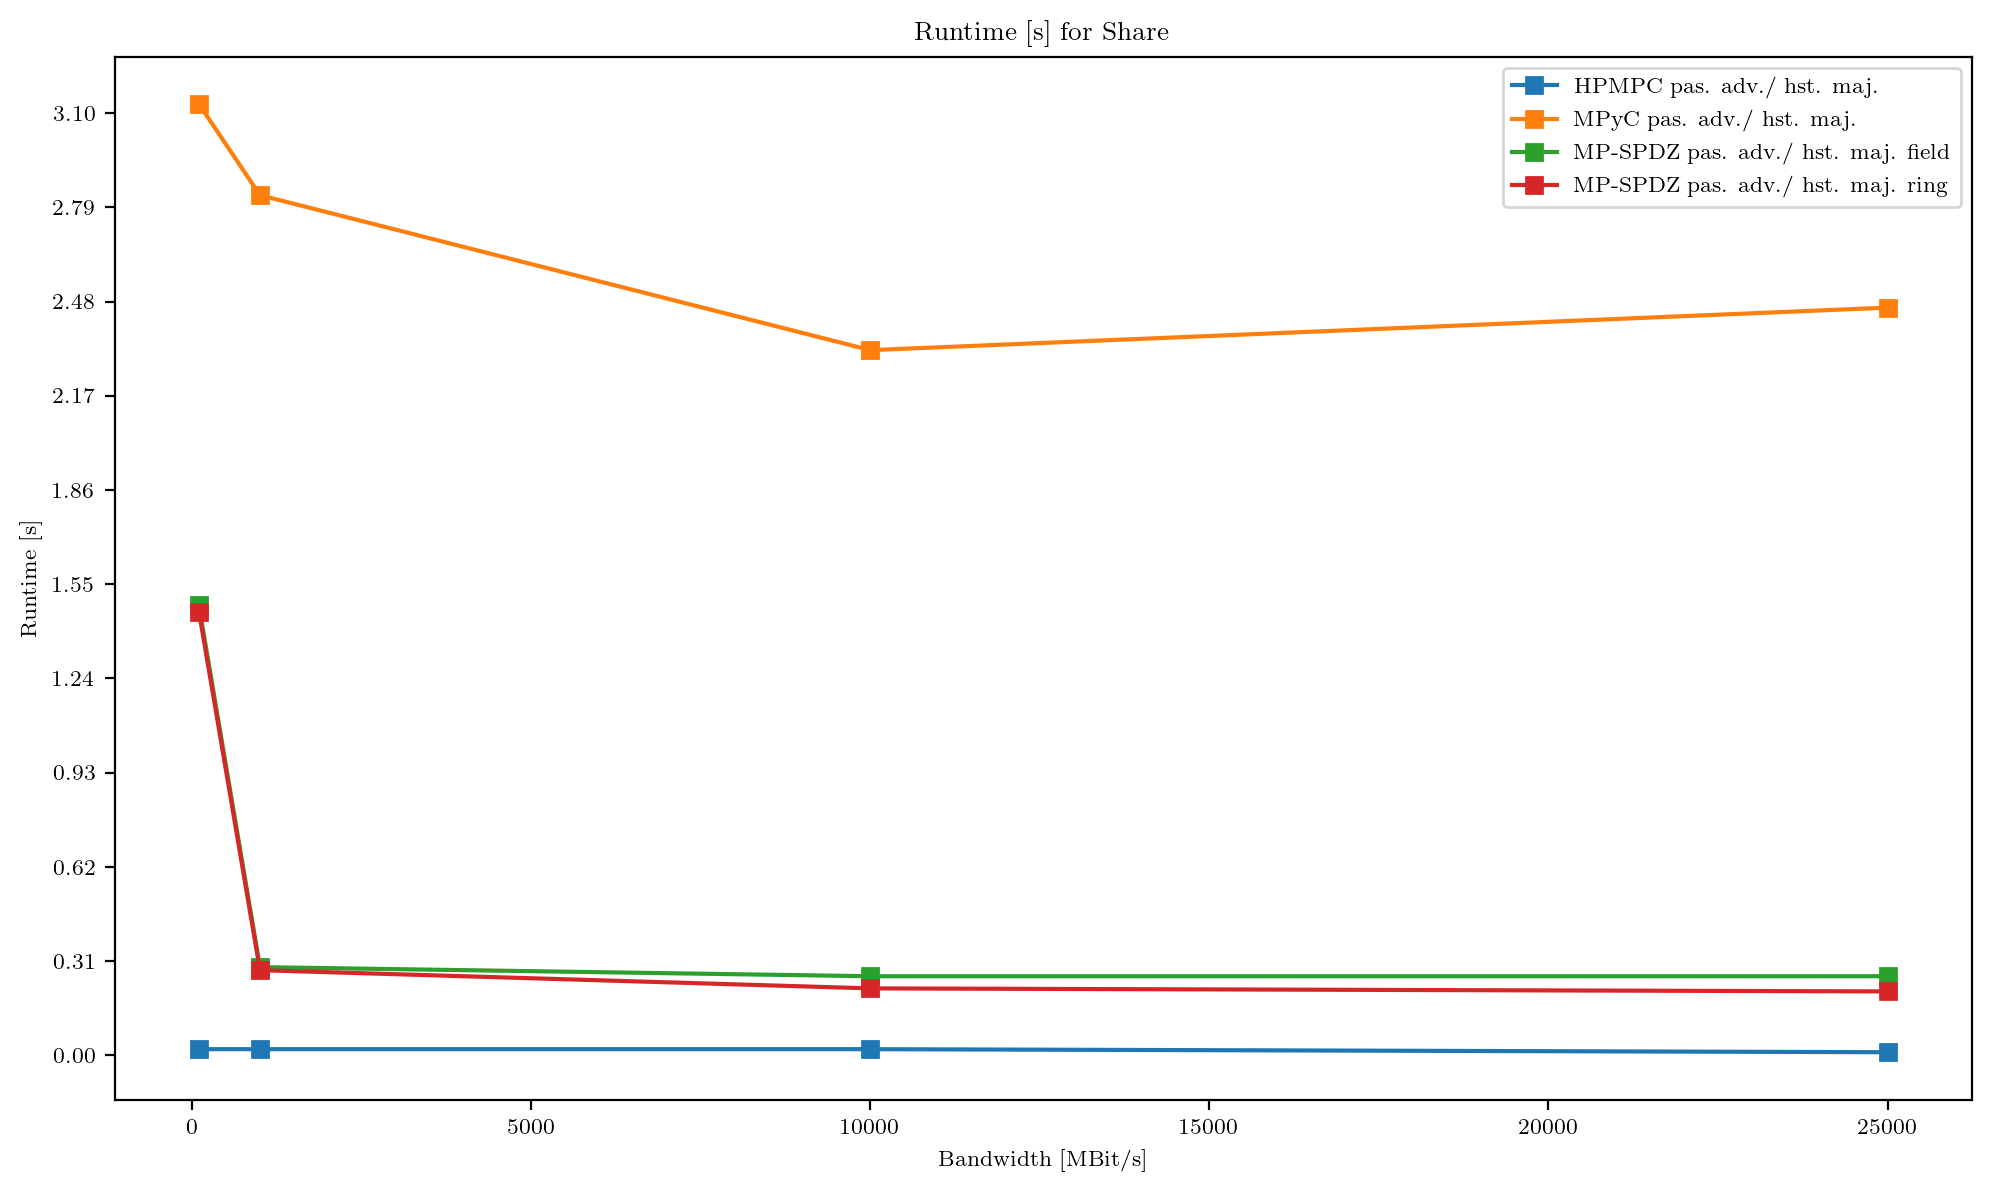

In [21]:
rf.plot_line(x_values,y_values,labels,"bandwidth_honest",experiment,x_axis="Bandwidth [MBit/s]",y_axis="Runtime [s]")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


3949


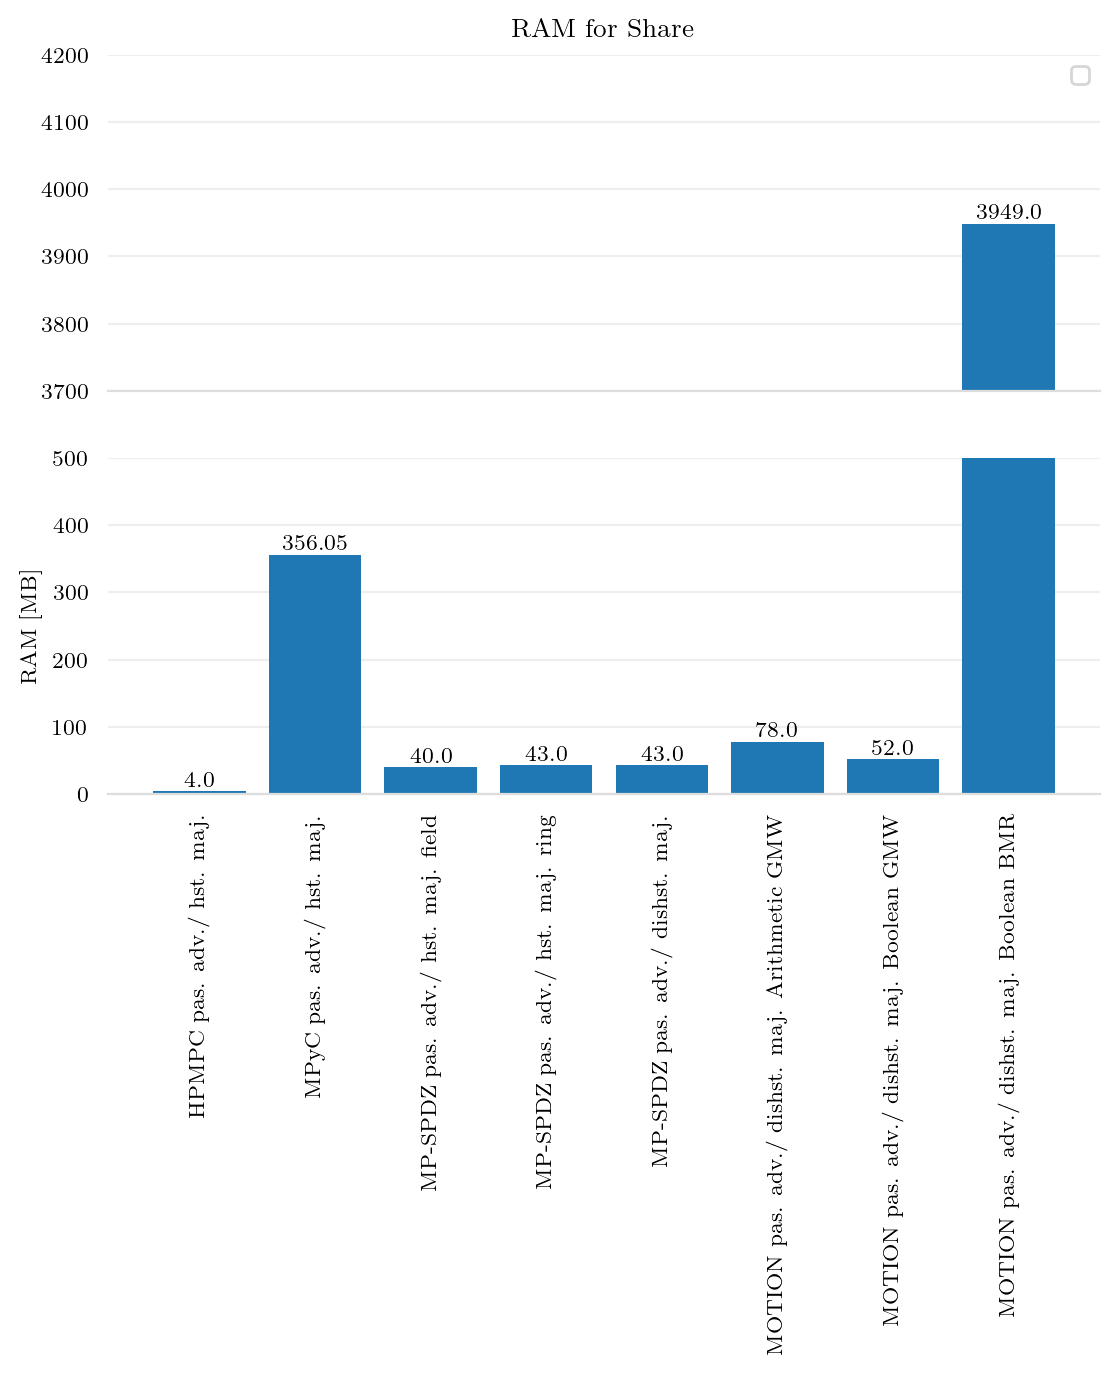

In [59]:
def plot_ram_bar(data,experiment,frameworks):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    values=[]
    labels=[]
    for i in range(len(data)):
        if data[i]['framework'][0] == "HPMPC":
            for function in data[i]['function'].unique():
                date = data[i].loc[(data[i]['function'] == function) & (data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['packetdrops(%)'] == 0) & (data[i]['preprocess']==0) & (data[i]['latencies(ms)'] == 0), ['peakRAM(MiB)']]
                values.append(float(list(date['peakRAM(MiB)'])[0]))
                labels.append(frameworks[i] + ' honest majority')
        elif data[i]['framework'][0] in ["MP-SPDZ","MOTION"]:
            for protocol in data[i]['protocol'].unique():
                if protocol not in ["ps-rep-field","ps-rep-ring","ps-rep-bin","sy-rep-field","malicious-rep-field"]:
                    date = data[i].loc[(data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['packetdrops(%)'] == 0) & (data[i]['protocol']==protocol) & (data[i]['latencies(ms)'] == 0), ['peakRAM(MiB)']]
                    values.append(round(list(date['peakRAM(MiB)'])[0],2))
                    labels.append(frameworks[i]+' '+str(protocol))
        else:
            date = data[i].loc[(data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['packetdrops(%)'] == 0) & (data[i]['latencies(ms)'] == 0), ['peakRAM(MiB)']]
            values.append(round(list(date['peakRAM(MiB)'])[0],2))
            labels.append(frameworks[i])
    #ax.set_yscale('log')  # Set y-axis as logarithmic

    labels[0]="HPMPC pas. adv./ hst. maj."
    labels[1]="MPyC pas. adv./ hst. maj."
    labels[2]="MP-SPDZ pas. adv./ hst. maj. field"
    labels[3]="MP-SPDZ pas. adv./ hst. maj. ring"
    labels[4]="MP-SPDZ pas. adv./ dishst. maj."
    labels[5]="MOTION pas. adv./ dishst. maj. Arithmetic GMW"
    labels[6]="MOTION pas. adv./ dishst. maj. Boolean GMW"
    labels[7]="MOTION pas. adv./ dishst. maj. Boolean BMR"
    bars=ax1.bar(labels,values)
    bars2=ax2.bar(labels,values)
    ax2.set_ylabel('RAM [MB]')
    ax1.set_title('RAM for Share')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_color('#DDDDDD')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_color('#DDDDDD')

    # Second, remove the ticks as well.
    ax1.tick_params(bottom=False, left=False)
    ax2.tick_params(bottom=False, left=False)
    # Third, add a horizontal grid (but keep the vertical grid hidden).
    # Color the lines a light gray as well.
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(True, color='#EEEEEE')
    ax1.xaxis.grid(False)
    ax2.set_axisbelow(True)
    ax2.yaxis.grid(True, color='#EEEEEE')
    ax2.xaxis.grid(False)
    # Rotate labels
    print(values[-1])
    ax1.legend()
    ax1.set_ylim(3700,4200)
    ax2.set_ylim(0,500)
    # Add values on top of bars
    for bar in bars2[:-1]:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval  +0.5, yval, ha='center', va='bottom',weight='bold')
    yval = bars[-1].get_height()
    plt.text(bars[-1].get_x() + bars[-1].get_width()/2, yval-3100 + 0.05, yval, ha='center', va='bottom',weight='bold')
    # zoom-in / limit the view to different portions of the data
    plt.xticks(rotation='vertical')
    plt.savefig(experiment+'_RAM_bar.png',dpi=300,bbox_inches='tight')
    plt.show()
plot_ram_bar(data,experiment,frameworks)

In [48]:
y_values_basic=[]
x_values=[]
for function in data[0]['function'].unique():
    y_values_basic.append(data[0].loc[(data[0]['function']==function)&(data[0]['bandwidths(Mbs)'] == 25000) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) &(data[0]['preprocess']==0) , ['runtime_external(s)']].to_numpy()[0][0])
    x_values.append('HPMPC passive adversary')
y_values_basic.append(data[1].loc[(data[1]['bandwidths(Mbs)'] == 25000) & (data[1]['packetdrops(%)'] == 0) & (data[1]['latencies(ms)'] == 0) , ['runtime_external(s)']].to_numpy()[0][0])
x_values.append('MPyC')
for protocol in data[2]['protocol'].unique():
    if protocol not in ["sy-rep-field","malicious-rep-field","ps-rep-field","ps-rep-ring","ps-rep-bin"]:
        y_values_basic.append(data[2].loc[(data[2]['bandwidths(Mbs)'] == 25000) & (data[2]['packetdrops(%)'] == 0) & (data[2]['protocol']==protocol) & (data[2]['latencies(ms)'] == 0), ['runtime_external(s)']].to_numpy()[0][0])
        x_values.append('MP-SPDZ '+protocol)
for protocol in data[3]['protocol'].unique():
    y_values_basic.append(data[3].loc[(data[3]['bandwidths(Mbs)'] == 25000) & (data[3]['packetdrops(%)'] == 0) & (data[3]['protocol']==protocol) & (data[3]['latencies(ms)'] == 0), ['runtime_external(s)']].to_numpy()[0][0])
    x_values.append('MOTION'+protocol)

In [51]:
y_values_basic

[0.009984, 2.46, 0.26, 0.21, 0.27, 3.14, 3.09, 2.63]

In [52]:
y_values_basic[0]=round(y_values_basic[0],4)

In [53]:
labels=x_values
labels[0]="HPMPC pas. adv./ hst. maj."
labels[1]="MPyC pas. adv./ hst. maj."
labels[2]="MP-SPDZ pas. adv./ hst. maj. field"
labels[3]="MP-SPDZ pas. adv./ hst. maj. ring"
labels[4]="MP-SPDZ pas. adv./ dishst. maj."
labels[5]="MOTION pas. adv./ dishst. maj. Arithmetic GMW"
labels[6]="MOTION pas. adv./ dishst. maj. Boolean GMW"
labels[7]="MOTION pas. adv./ dishst. maj. Boolean BMR"
labels

['HPMPC pas. adv./ hst. maj.',
 'MPyC pas. adv./ hst. maj.',
 'MP-SPDZ pas. adv./ hst. maj. field',
 'MP-SPDZ pas. adv./ hst. maj. ring',
 'MP-SPDZ pas. adv./ dishst. maj.',
 'MOTION pas. adv./ dishst. maj. Arithmetic GMW',
 'MOTION pas. adv./ dishst. maj. Boolean GMW',
 'MOTION pas. adv./ dishst. maj. Boolean BMR']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


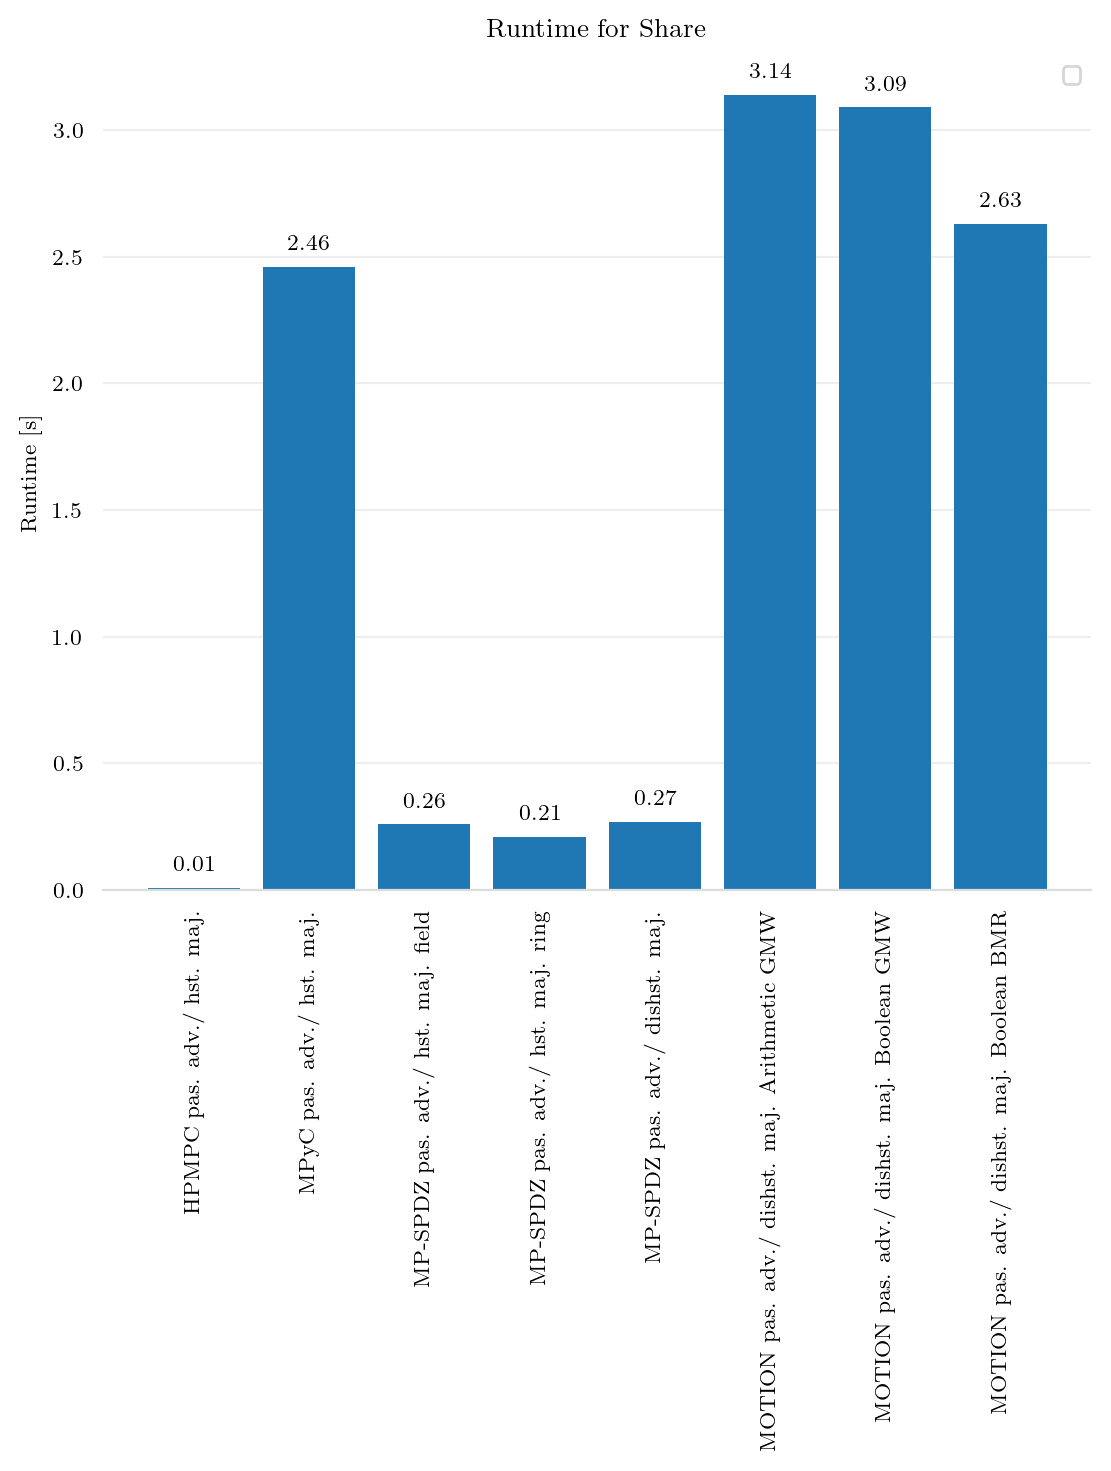

In [54]:
rf.basic_bar_plot(y_values_basic,labels,experiment,'Runtime for Share','Runtime [s]')

In [30]:
data[3].loc[(data[3]['bandwidths(Mbs)'] == 25000)  &(data[3]['packetdrops(%)'] == 0)  & (data[3]['latencies(ms)'] == 0), ['runtime_external(s)']]

,runtime_external(s)
0,19.6
